<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
sklearn ensemble impl two :

 Random Forest
 Extra Tree Forest
"""

In [0]:
"""
RandomForest

RandomForestClassifier and RandomForestRegressor

Each tree in the ensemble is built from a sample with replacement. Further for 
splitting only part of features are used to find the best split ( unlke decision trees)
In other words, the split that is picked is the best split among a random subset of the features. 
As a result, the bias of the forest becomes slightly higher but due to averaging variance decreases

ExtraTrees

ExtraTreesClassifier and ExtraTreesRegressor classes
In extremely randomized trees randomness goes a step further in the way splits are computed.

Similar to randomforest features are randomly picked however, the threshold to split is also randomly selected 
instead of most discriminative thresholds.
As a result, the variance decreases even more but bias increases slightly more.


"""

In [0]:
"""
Parameteres used

n_estimators  : Number of Foresrt

max_features : sqrt(n_features) for classification or n_features for regression

"""

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor

In [4]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [0]:
targets = data.target

In [0]:
data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test  = data[targets >= 30]

In [0]:
n_faces = 5
rng = check_random_state(4)

face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]

X_train = train[:, :(n_pixels +1)//2]
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

In [0]:
# Estimator

estimator = ExtraTreesRegressor(n_estimators=10, max_features=32, random_state=42)



In [0]:
estimator = estimator.fit(X_train, y_train)
y_test_predict = estimator.predict(X_test)

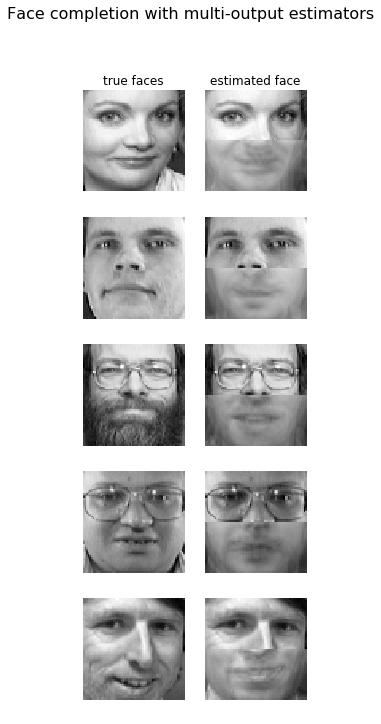

In [19]:
# Plot the completed faces
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
  true_face = np.hstack((X_test[i], y_test[i]))
  
  if i:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
  else:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")
    
  sub.axis("off")
  sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")
  
  completed_face = np.hstack((X_test[i], y_test_predict[i]))
  
  
  if i:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)
  else:
    sub = plt.subplot(n_faces, n_cols, i * n_cols + 2,
                              title="estimated face")
    
  sub.axis("off")
  
  sub.imshow(completed_face.reshape(image_shape),cmap=plt.cm.gray,
            interpolation="nearest")

In [0]:
"""
Feature importance evaluation

Features at any level split decision. Features used at the top of the tree 
contribute to the final prediction decision of a larger fraction of the input 
samples. 

The expected fraction of the samples they contribute can also estimate the relative
importance of the features. 

This fraction is combined with decrease in impurity for splitting can be used to 
create a normalized estimate of predictive power.

By averaging the estimated predictive power over several RF trees reduces the variance

"""

In [0]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as load_boston
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [25]:
boston = load_boston()
print(boston.data.shape)

X = boston.data
y = boston.target

(506, 13)


In [27]:
feature_name = boston.feature_names
feature_name

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [45]:
param_grid = {"n_estimators": list(range(50, 550, 50))}
clf = ExtraTreesRegressor()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))


results = grid_search.cv_results_

GridSearchCV took 18.93 seconds for 10 candidate parameter settings.


In [46]:
forest = grid_search.best_estimator_
forest

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [48]:
importance = forest.feature_importances_
importance

array([0.03739453, 0.00415234, 0.02560316, 0.01976907, 0.04639998,
       0.37268181, 0.01871902, 0.0313576 , 0.01852916, 0.05723888,
       0.0406272 , 0.01605812, 0.31146912])

In [0]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

In [53]:
indices = np.argsort(importance)[::-1]
indices

array([ 5, 12,  9,  4, 10,  0,  7,  2,  3,  6,  8, 11,  1])

(-1, 13)

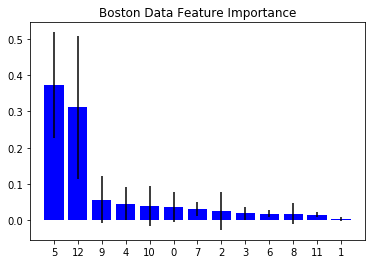

In [61]:
plt.figure()
plt.title("Boston Data Feature Importance")
plt.bar(range(X.shape[1]), importance[indices], color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

In [56]:
feature_name[indices]

array(['RM', 'LSTAT', 'TAX', 'NOX', 'PTRATIO', 'CRIM', 'DIS', 'INDUS',
       'CHAS', 'AGE', 'RAD', 'B', 'ZN'], dtype='<U7')

In [0]:
"""
random_search = RandomizedSearchCV(clf, param_distributions=param_grid,
                                   n_iter=20, cv=5, iid=False)
"""